<a href="https://colab.research.google.com/github/Alex-Witt/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data',na_values = ['?'], header = None, names = ['Age','Op_Year','n_Aux_Nodes','Survived'])
print(df.shape)
df.head()

(306, 4)


,Age,Op_Year,n_Aux_Nodes,Survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
#306 Rows matches the description from UCI. Looks like we match. 
#Since UCI likes to change NAN values to '?'', I changed any '?' back to null in the previous cell. 
df.isnull().sum()

Age            0
Op_Year        0
n_Aux_Nodes    0
Survived       0
dtype: int64

In [4]:
#Changing 0's to 1's for a more Boolean entry. 

df_b = df.copy()
df_b = df_b.drop(['Age', 'Op_Year', 'n_Aux_Nodes'], axis = 1)

df_b = df_b.replace(2,0,)

df.Survived = df_b.Survived

#Let's make sure the data was not affected incorrectly.

print(df.shape)
print(df.nunique())
print(df.isnull().sum())
df.head()

(306, 4)
Age            49
Op_Year        12
n_Aux_Nodes    31
Survived        2
dtype: int64
Age            0
Op_Year        0
n_Aux_Nodes    0
Survived       0
dtype: int64


,Age,Op_Year,n_Aux_Nodes,Survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

### Please Note:
The charts and tables in this section are not final products. They are for quick reference and analysis, as well as for showing my code. For more comprehensively labeled and polished analysis, please refer to section 3. 

In [0]:
#Setting up some bins and functions for efficient crosstab creation. 

n_bins = 5
Age = pd.cut(df.Age,n_bins)
Op_Year = pd.cut(df.Op_Year,n_bins)
n_Aux = pd.cut(df.n_Aux_Nodes,n_bins)
Survived = pd.cut(df.Survived,2)

def cross(dep , ind):
  res = pd.crosstab(dep,ind)
  return res

def cross_per(dep , ind):
  res = pd.crosstab(dep,ind, normalize = 'columns')
  return res

def crossum(dep , ind):
  resum = pd.crosstab(dep.count(),ind)
  return resum

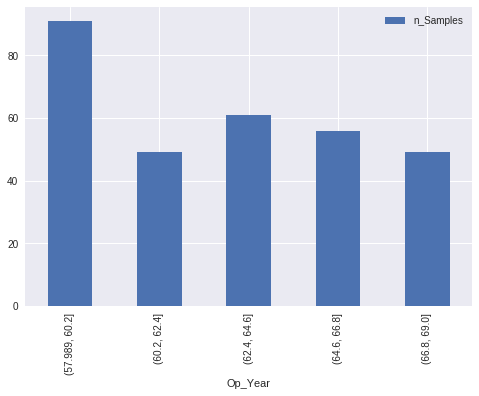

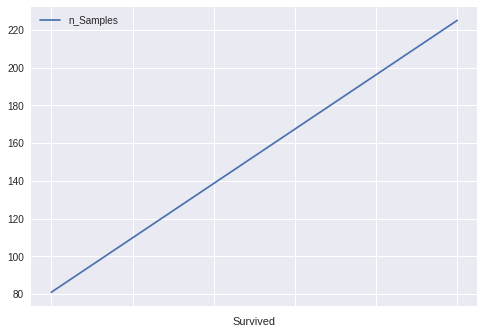

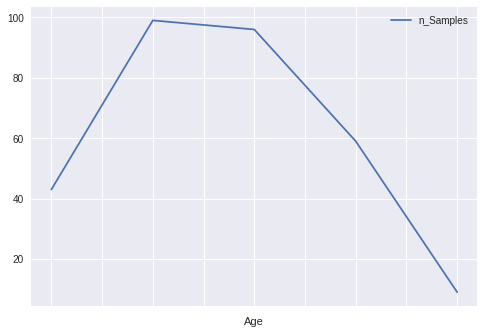

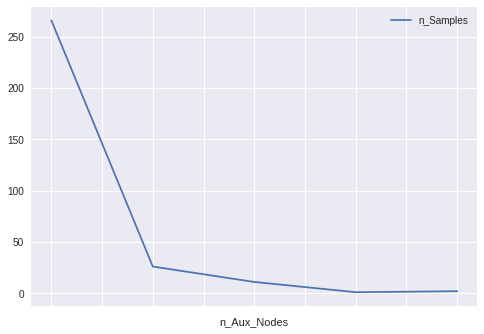

In [6]:
#I want to get a look at the shape of the data by bins. In this case, I want to see how populated each bin is. 
#Visualizations are to get a quick idea if I need to work with numbers or ratios. 

n_Survived = pd.pivot_table(crossum(n_Aux, Survived), columns = 'n_Samples')
n_Age = pd.pivot_table(crossum(n_Aux, Age), columns = 'n_Samples')
n_Op_Year = pd.pivot_table(crossum(n_Aux, Op_Year), columns = 'n_Samples')
n_n_Aux = pd.pivot_table(crossum(Op_Year,n_Aux), columns = 'n_Samples')

n_Op_Year.plot.bar()
n_Survived.plot.line()
n_Age.plot.line()
n_n_Aux.plot.line()

n_Aux_Nodes,"(-0.052, 10.4]","(10.4, 20.8]","(20.8, 31.2]","(31.2, 41.6]","(41.6, 52.0]"
Survived,,,,,
"(-0.001, 0.5]",58,15,6,1,1
"(0.5, 1.0]",208,11,5,0,1


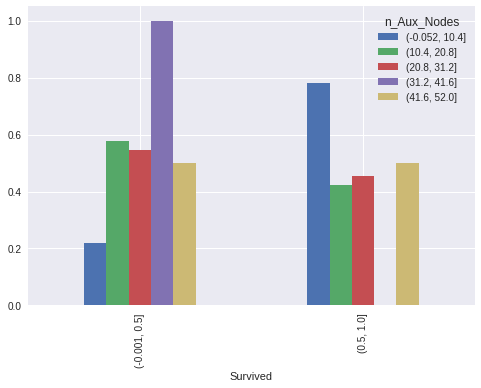

In [7]:
cross_per(Survived, n_Aux).plot.bar()
cross(Survived, n_Aux)

Age,"(29.947, 40.6]","(40.6, 51.2]","(51.2, 61.8]","(61.8, 72.4]","(72.4, 83.0]"
Survived,,,,,
"(-0.001, 0.5]",4,31,27,16,3
"(0.5, 1.0]",39,68,69,43,6


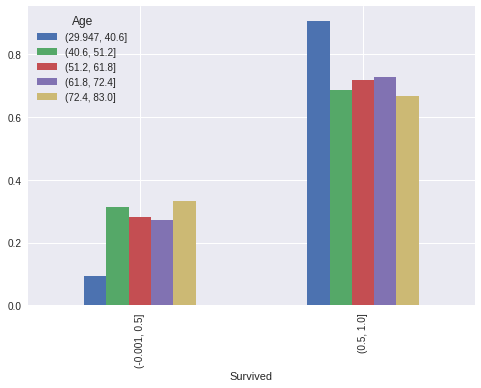

In [8]:
cross_per(Survived, Age).plot.bar()
cross(Survived, Age)

Op_Year,"(57.989, 60.2]","(60.2, 62.4]","(62.4, 64.6]","(64.6, 66.8]","(66.8, 69.0]"
Survived,,,,,
"(-0.001, 0.5]",25,10,16,19,11
"(0.5, 1.0]",66,39,45,37,38


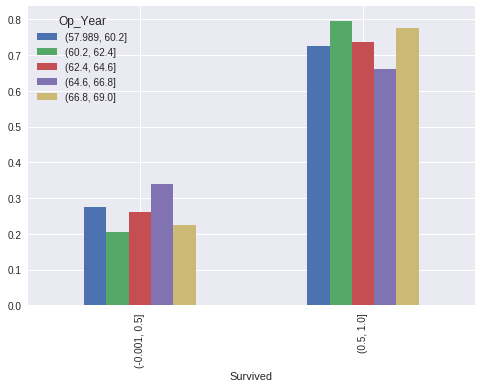

In [9]:
cross_per(Survived,Op_Year).plot.bar()
cross(Survived,Op_Year)

n_Aux_Nodes,"(-0.052, 10.4]","(10.4, 20.8]","(20.8, 31.2]","(31.2, 41.6]","(41.6, 52.0]"
Age,,,,,
"(29.947, 40.6]",38,3,2,0,0
"(40.6, 51.2]",85,11,2,0,1
"(51.2, 61.8]",83,7,4,1,1
"(61.8, 72.4]",51,5,3,0,0
"(72.4, 83.0]",9,0,0,0,0


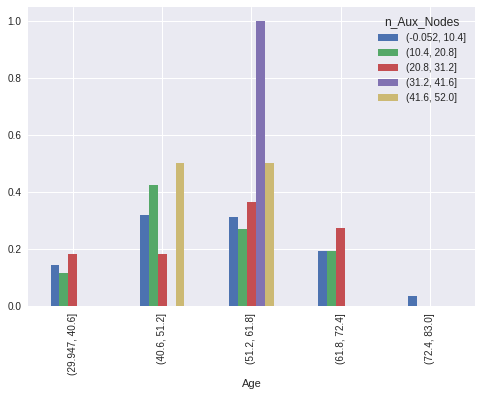

In [10]:
cross_per(Age, n_Aux).plot.bar()
cross(Age, n_Aux)

Op_Year,"(57.989, 60.2]","(60.2, 62.4]","(62.4, 64.6]","(64.6, 66.8]","(66.8, 69.0]"
Age,,,,,
"(29.947, 40.6]",20,3,8,7,5
"(40.6, 51.2]",27,17,25,17,13
"(51.2, 61.8]",27,17,18,16,18
"(61.8, 72.4]",16,10,9,13,11
"(72.4, 83.0]",1,2,1,3,2


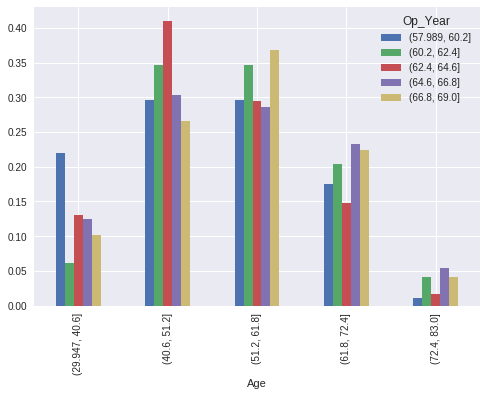

In [11]:
cross_per(Age, Op_Year).plot.bar()
cross(Age, Op_Year)

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

### Positive and Negative Associations with Survival

The most clear cut association with surivavl is the number of Auxiliary Nodes found in patients. In the figure below, notice that the the higher rate of survival (~78%) of those with >10 Auxiliary nodes compared to the higher Node count categories. Upon closer analysis, the overwhelming percentage comes from those with 1 detected node or less. After that one node threshold survivability drops off rapidly. Also note that any remaining subset after the low note subset (>5 Nodes), has a much smaller sample size to work with. 

The smaller sample sizes actually tend to skew the data in a way that may result in spurious correlations. For example, in the same chart, there is a 100% fatality rate for those with 31-41 Auxiliary Nodes. Similarly, every one of these individuals were in the age range of 51 to 61 years. The problem with this correlation is sample size. There is only one person who fits under this category, thus skewing the data. Therefore, it is difficult to ascertain any insight from the higher subsets of Auxiliary Nodes on surivability. 




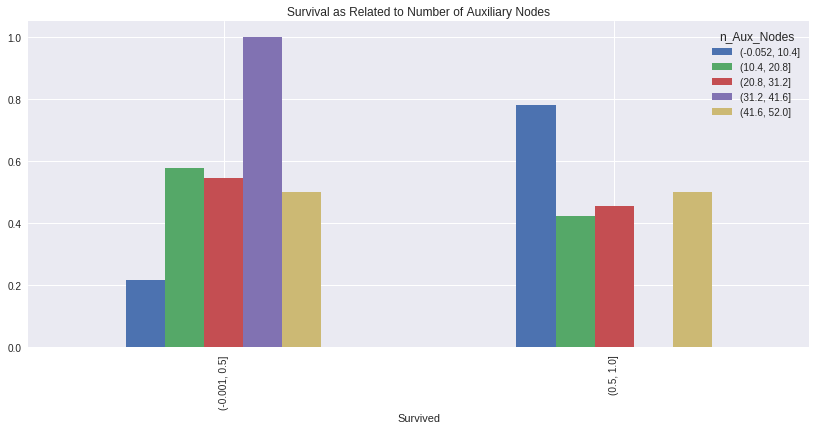

In [12]:
cross_per(Survived, n_Aux).plot.bar(title = 'Survival as Related to Number of Auxiliary Nodes', figsize = (14,6));

If presence of and frequency of Auxiliary Nodes is correlated with survivability, then there should be clear correlation in the more populace subsets. The Figure below, illustrates just that. Patients with no Auxiliary Nodes had a survivabilty of >80%, which declines to 50% at 11 Nodes. This trend backs up the statement that Auxiliary Nodes found in the patient are clearly correlated with survivability. 


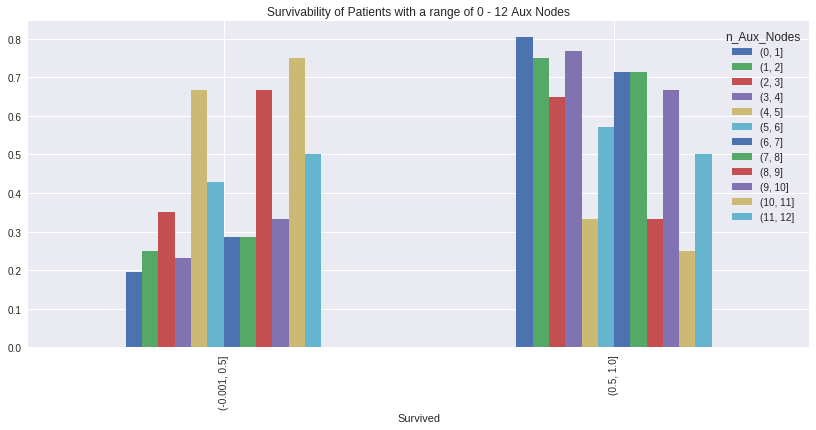

In [13]:
d_Aux = pd.cut(df.n_Aux_Nodes,(0,1,2,3,4,5,6,7,8,9,10,11,12))
cross_per(Survived,d_Aux).plot.bar(title = "Survivability of Patients with a range of 0 - 12 Aux Nodes", figsize = (14,6))

**In conclusion, we can associate the presence of Auxiliary Nodes in the Patient with a higher mortality rate. Furthermore, the more Auxiliary Notes found is correlated with a higher mortality rate in the patient.**